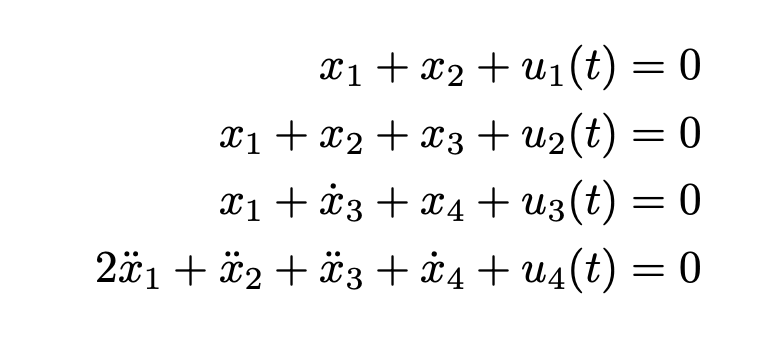

In [1]:
import networkx as nx
import sympy as sp

sp.init_printing()

from index_reduction import IndexReduction, draw_graph

%load_ext autoreload
%autoreload 2

In [2]:
def pprint(exprs, heading="expressions"):
    print(heading)
    for expr in exprs:
        display(expr)

In [3]:
# Define the symbol for time
t = sp.symbols("t")

# Define parameters
u1 = sp.Function("u1")(t)
u2 = sp.Function("u2")(t)
u3 = sp.Function("u3")(t)
u4 = sp.Function("u4")(t)

# Define functions of time
x1 = sp.Function("x_1")(t)
x2 = sp.Function("x_2")(t)
x3 = sp.Function("x_3")(t)
x4 = sp.Function("x_4")(t)
x5 = sp.Function("x_5")(t)  # der x1
x6 = sp.Function("x_6")(t)  # der x2
x7 = sp.Function("x_7")(t)  # der x3


# knowns
knowns = [u1, u2, u3, u4]

# Define the derivatives of these functions with respect to time
x1_dot = x1.diff(t)
x2_dot = x2.diff(t)

x3_dot = x3.diff(t)
x4_dot = x4.diff(t)

x5_dot = x5.diff(t)
x6_dot = x6.diff(t)
x7_dot = x7.diff(t)

# Define equations
eq0 = x1 + x2 + u1
eq1 = x1 + x2 + x3 + u2
eq2 = x1 + x3_dot + x4 + u3
eq3 = 2 * x5_dot + x6_dot + x7_dot + x4_dot + u4
eq4 = x1_dot - x5
eq5 = x2_dot - x6
eq6 = x3_dot - x7


# Equations list
eqs = [eq0, eq1, eq2, eq3, eq4, eq5, eq6]

# pprint(eqs, "Equations")

In [4]:
ir = IndexReduction(t, eqs, knowns, notebook=True)

In [5]:
ir.x

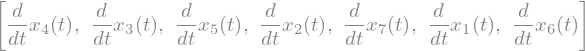

In [6]:
ir.x_dot

In [7]:
ir.y

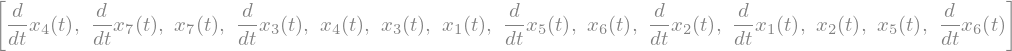

In [8]:
ir.X

In [9]:
ir.A

[None, None, 1, None, 0, 3, 10, None, 13, None, None, 9, 7, None]

In [10]:
ir.M

In [11]:
ir.N

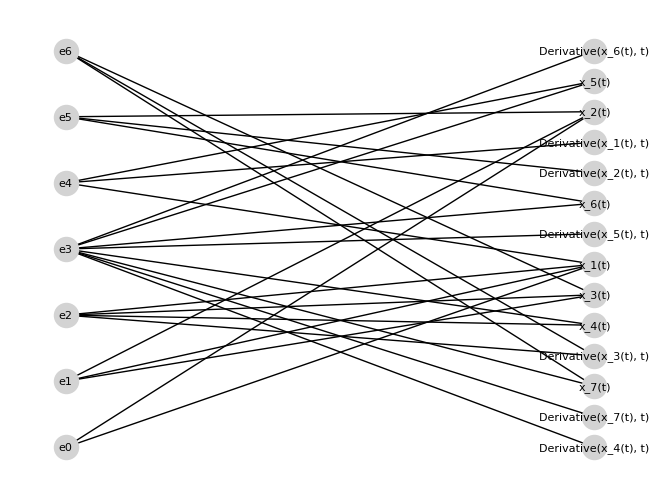

In [12]:
draw_graph(ir.G)

In [13]:
ir.pantelides()

# Panteides Algorithm Completed 

Total equations (before|after): 7|15
Total variables (before|after): 14|17


Variables 

[Derivative(x_4(t), t), Derivative(x_7(t), t), x_7(t), Derivative(x_3(t), t), x_4(t), x_3(t), x_1(t), Derivative(x_5(t), t), x_6(t), Derivative(x_2(t), t), Derivative(x_1(t), t), x_2(t), x_5(t), Derivative(x_6(t), t), Derivative(x_3(t), (t, 2)), Derivative(x_2(t), (t, 2)), Derivative(x_1(t), (t, 2))]


Equations 

u1(t) + x_1(t) + x_2(t)
u2(t) + x_1(t) + x_2(t) + x_3(t)
u3(t) + x_1(t) + x_4(t) + Derivative(x_3(t), t)
u4(t) + Derivative(x_4(t), t) + 2*Derivative(x_5(t), t) + Derivative(x_6(t), t) + Derivative(x_7(t), t)
-x_5(t) + Derivative(x_1(t), t)
-x_6(t) + Derivative(x_2(t), t)
-x_7(t) + Derivative(x_3(t), t)
Derivative(u1(t), t) + Derivative(x_1(t), t) + Derivative(x_2(t), t)
Derivative(u2(t), t) + Derivative(x_1(t), t) + Derivative(x_2(t), t) + Derivative(x_3(t), t)
Derivative(u3(t), t) + Derivative(x_1(t), t) + Derivative(x_3(t), (t, 2)) + Derivative(x_4(t),

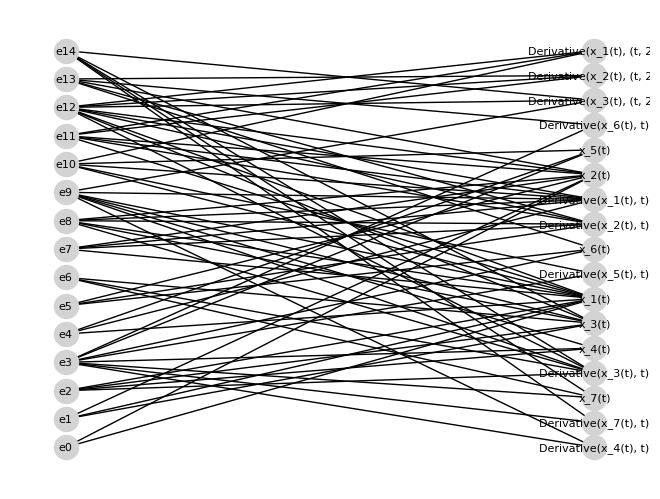

In [14]:
draw_graph(ir.G)

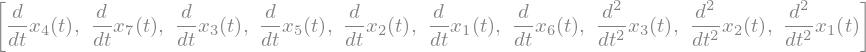

In [15]:
ir.pantelides_vars

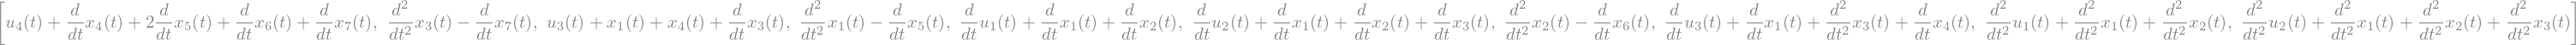

In [16]:
ir.pantelides_eqs

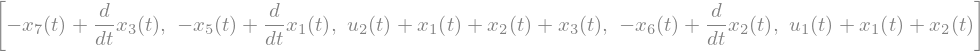

In [17]:
ir.pantelides_removed_eqs

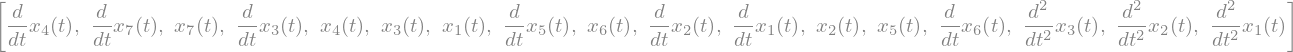

In [18]:
ir.X

In [19]:
ir.make_BLT_graph()

equation e3 is matched to variable v0
and contains the following variables: {Derivative(x_4(t), t), Derivative(x_6(t), t), Derivative(x_5(t), t), Derivative(x_7(t), t)}
with indices: [0, 13, 7, 1] 

equation e9 is matched to variable v14
and contains the following variables: {Derivative(x_4(t), t), Derivative(x_1(t), t), Derivative(x_3(t), (t, 2))}
with indices: [0, 10, 14] 

equation e10 is matched to variable v7
and contains the following variables: {Derivative(x_1(t), (t, 2)), Derivative(x_5(t), t)}
with indices: [16, 7] 

equation e11 is matched to variable v15
and contains the following variables: {Derivative(x_2(t), (t, 2)), Derivative(x_1(t), (t, 2))}
with indices: [15, 16] 

equation e12 is matched to variable v16
and contains the following variables: {Derivative(x_2(t), (t, 2)), Derivative(x_3(t), (t, 2)), Derivative(x_1(t), (t, 2))}
with indices: [15, 14, 16] 

equation e13 is matched to variable v13
and contains the following variables: {Derivative(x_2(t), (t, 2)), Derivativ

In [20]:
ir.BLT_graph

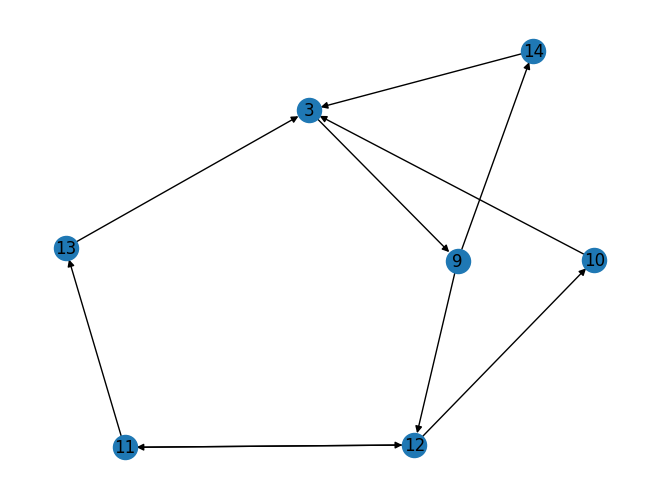

In [21]:
nx.draw(ir.BLT_graph, with_labels=True)

In [22]:
ir.e_mapping

{'e0': 0,
 'e1': 1,
 'e2': 2,
 'e3': 3,
 'e4': 4,
 'e5': 5,
 'e6': 6,
 'e7': 7,
 'e8': 8,
 'e9': 9,
 'e10': 10,
 'e11': 11,
 'e12': 12,
 'e13': 13,
 'e14': 14}

In [23]:
ir.v_mapping

{'Derivative(x_4(t), t)': 0,
 'Derivative(x_7(t), t)': 1,
 'x_7(t)': 2,
 'Derivative(x_3(t), t)': 3,
 'x_4(t)': 4,
 'x_3(t)': 5,
 'x_1(t)': 6,
 'Derivative(x_5(t), t)': 7,
 'x_6(t)': 8,
 'Derivative(x_2(t), t)': 9,
 'Derivative(x_1(t), t)': 10,
 'x_2(t)': 11,
 'x_5(t)': 12,
 'Derivative(x_6(t), t)': 13,
 'Derivative(x_3(t), (t, 2))': 14,
 'Derivative(x_2(t), (t, 2))': 15,
 'Derivative(x_1(t), (t, 2))': 16}

In [24]:
ir.assign

[3, 14, None, 2, None, None, None, 10, None, 7, 8, None, None, 13, 9, 11, 12]

In [25]:
ir.matching

In [26]:
blt = list(nx.strongly_connected_components(ir.BLT_graph))

In [27]:
ir.BLT

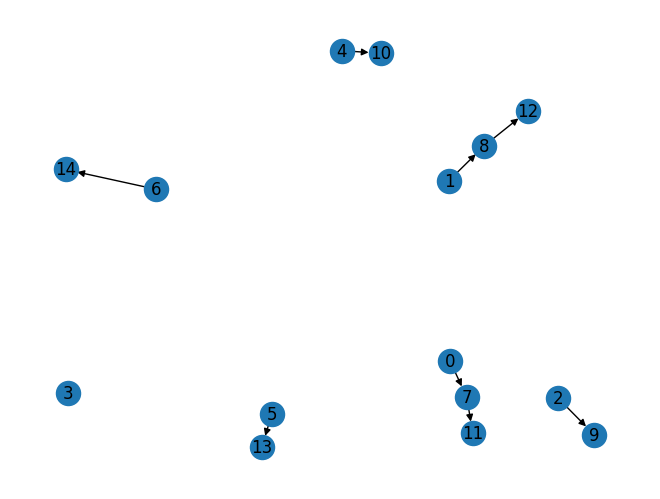

In [28]:
nx.draw(ir.eq_diff_graph, with_labels=True)

In [29]:
ir = ir

In [30]:
ir.dummy_derivatives()

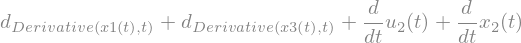

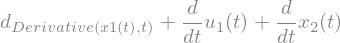

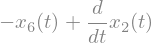

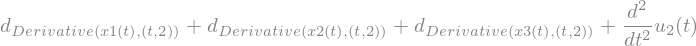

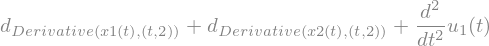

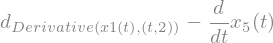

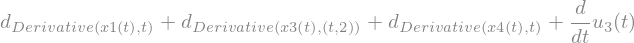

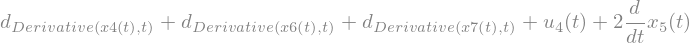

In [31]:
for eq in ir.final_dae_eqs:
    display(eq)